## 1) Importing libraries & dataset

#### (1) importing libraries - 한 번에 통째로 클릭

In [ ]:
!git clone https://github.com/kakao/khaiii.git
!pip install cmake
!mkdir build
!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

Cloning into 'khaiii'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 957 (delta 25), reused 49 (delta 19), pack-reused 877
Receiving objects: 100% (957/957), 33.03 MiB | 2.38 MiB/s, done.
Resolving deltas: 100% (383/383), done.
-- [hunter] Initializing Hunter workspace (70287b1ffa810ee4e952052a9adff9b4856d0d54)
-- [hunter]   https://github.com/ruslo/hunter/archive/v0.23.34.tar.gz
-- [hunter]   -> /root/.hunter/_Base/Download/Hunter/0.23.34/70287b1
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
--

In [ ]:
from khaiii import KhaiiiApi
import pandas as pd
import numpy as np
import re

#### (2) 드라이브 마운트 - 공유드라이브에서 데이터셋 불러옵니다. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
X_train=pd.read_csv("/content/drive/Shareddrives/20-2 KUBIG 자연어처리 프로젝트/최종 트레이닝데이터/x_train.csv")
y_train=pd.read_csv("/content/drive/Shareddrives/20-2 KUBIG 자연어처리 프로젝트/최종 트레이닝데이터/y_train.csv")

#### (3) 데이터 확인하고, 나누어서 저장합니다

In [ ]:
X_train = X_train.drop(['Unnamed: 0'],axis=1)
X_train

,document
0,평점에 스포 달린 영화는 무조건 점
1,재밌습니다 잘 만든 영화라는
2,딱 점
3,만남과 헤어짐 그리고 재회
4,롱기스트 야드를 먼저 봐서 그런지 진짜 쓰레기 특히 주인공 진짜 맘에 안 든다
...,...
99433,최고 다 년 전 영화라고 안 믿길 정도
99434,시간 아깝다고 할 정도의 실패작은 아닌 것 같다 박 진영의 연기도 생각 외로 괜찮았...
99435,오다기리 조는 맨날 나와
99436,붐 얼굴 보면 화가 나


In [ ]:
X_train.head()

,document
0,평점에 스포 달린 영화는 무조건 점
1,재밌습니다 잘 만든 영화라는
2,딱 점
3,만남과 헤어짐 그리고 재회
4,롱기스트 야드를 먼저 봐서 그런지 진짜 쓰레기 특히 주인공 진짜 맘에 안 든다


In [ ]:
X_train=X_train.dropna(how = 'any')

In [ ]:
X_train.shape

(99438, 1)

In [ ]:
dat1=X_train[:30001]
dat2=X_train[30001:60001]
dat3=X_train[60001:90001]
dat4=X_train[90001:]

#### (4) 형태소 분석기 돌리기 

In [ ]:
api = KhaiiiApi()

In [ ]:
significant_tags = ['NNG', 'NNP', 'NNB', 'VV', 'VA', 'VX', 'MAG', 'MAJ', 'XSV', 'XSA']

In [ ]:
def pos_text(texts):
    corpus = []
    for sent in texts:
        pos_tagged = ''
        for word in api.analyze(sent):
            for morph in word.morphs:
                if morph.tag in significant_tags:
                    pos_tagged += morph.lex + '/' + morph.tag + ' '
        corpus.append(pos_tagged.strip())
    return corpus

In [ ]:
tagged_corpus1=pos_text(dat1["document"])

In [ ]:
tagged_corpus2=pos_text(dat2["document"])

In [ ]:
tagged_corpus3=pos_text(dat3["document"])

In [ ]:
tagged_corpus4=pos_text(dat4["document"])

In [ ]:
p1 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XS.')
p2 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XSA [가-힣A-Za-z0-9]+/VX')
p3 = re.compile('[가-힣A-Za-z0-9]+/VV')
p4 = re.compile('[가-힣A-Za-z0-9]+/VX')

In [ ]:
tag_corp=tagged_corpus1+tagged_corpus2+tagged_corpus3+tagged_corpus4

In [ ]:
print(tag_corp[:2])

['평점/NNG 스포/NNG 달리/VV 영화/NNG 무조건/MAG 점/NNG', '재미있/VA 잘/MAG 만들/VV 영화/NNG']


## 2) preprocessing - 정규화 등

In [ ]:
def stemming_text(text):
    corpus = []
    for sent in text:
        ori_sent = sent
        mached_terms = re.findall(p1, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        
        mached_terms = re.findall(p2, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                if tag != 'VX':
                    modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p3, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p4, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        corpus.append(ori_sent)
    return corpus

In [ ]:
stemming_corpus = stemming_text(tag_corp)

In [ ]:
for i in range(0, 30):
    print(stemming_corpus[i])

평점/NNG 스포/NNG 달리다/VV 영화/NNG 무조건/MAG 점/NNG
재미있/VA 잘/MAG 만들다/VV 영화/NNG
딱/MAG 점/NNG
만남/NNG 헤어지다/VV 그리고/MAJ 재회/NNG
롱/NNG 기스트/NNP 야/NNG 드/NNP 먼저/MAG 보다/VV 그렇/VA 진짜/NNG 쓰레기/NNG 특히/MAG 주인공/NNG 진짜/NNG 맘/NNG 안/MAG 들다/VV
오늘/NNG 고지전/NNG 다시/MAG 보다/VV 나라/NNG 위하다/VV 휴전/NNG 직전/NNG 싸우다/VV 전사하다/VV 참전/NNG 용사/NNG 감사/NNG 드다/VV 리/XSV
술/NNG 담배/NNG 더/MAG 해롭/VA 것/NNB 막장/NNG 드라마/NNG
정말/MAG 좋/VA 특히/MAG 영상/NNG 음악/NNG
ㅡ/NNP
예고편/NNG 낚이다/VV 최악/NNG 영화/NNG 중/NNB
현실/NNG 재밌/VA
하/XSA 영화/NNG 만들다/VV 내다/VV 수/NNB 없/VA 구로/NNP 사와/NNG 재능/NNG
우/MAG 굳ㅋ/MAG 재미/NNG 있/VA
쩌르다/VV 진짜/MAG 국영/NNG 형/NNG 최고/NNG
쓰레기/NNG 영화/NNG 다/MAG 있다/VV 인물/NNG 관계/NNG 정리/NNG 안/MAG 하다/VV 주다/VV 줄거리/NNG 없/VA 내용/NNG ㅉ/NNG
무섭/VA 오페라/NNG 유령/NNG 프레데/NNP 터/NNG
결혼하다/VV 보다/VV 미혼/NNG 때/NNG 또/MAG 감동/NNG 받다/VV 영화/NNG
캐서린/NNP 제타/NNG 존스/NNP 보톡스/NNG 자연스럽다/VV 영화/NNG 마치/MAG 전성기/NNG 훨씬/MAG 지나다/VV 톱스타/NNG 뒤늦/VA 공연/NNG 하다/VV 듯하다/VV 느낌/NNG 마디/NNG 철/NNG 지나다/VV 급/NNG 액션/NNG
이상하다/VV 것/NNB 만들다/VV 것/NNB 왠지/MAG 시간/NNG 지나다/VV 허접하다/VV 지다/VV
드라마/NNG 재밌/VA 보다/VV 것/NNB 없/VA 것/NNB 같/VA 구다

In [ ]:
def text_cleaning(text):
   hangul=re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]+")
   result=hangul.sub('', text)
   return result

In [ ]:
for sent in stemming_corpus:
  map(text_cleaning, sent)

In [ ]:
corpus=[]
for i in range(0, len(stemming_corpus)):
  corpus.append(text_cleaning(stemming_corpus[i]))

In [ ]:
clean_corpus=corpus

In [ ]:
corpus=[]
for sent in clean_corpus:
  corpus.append(sent.split())

In [ ]:
corpus_comma=corpus

In [ ]:
for i in range(0, 30):
    print(corpus_comma[i])

['평점', '스포', '달리다', '영화', '무조건', '점']
['재미있', '잘', '만들다', '영화']
['딱', '점']
['만남', '헤어지다', '그리고', '재회']
['롱', '기스트', '야', '드', '먼저', '보다', '그렇', '진짜', '쓰레기', '특히', '주인공', '진짜', '맘', '안', '들다']
['오늘', '고지전', '다시', '보다', '나라', '위하다', '휴전', '직전', '싸우다', '전사하다', '참전', '용사', '감사', '드다', '리']
['술', '담배', '더', '해롭', '것', '막장', '드라마']
['정말', '좋', '특히', '영상', '음악']
['ㅡ']
['예고편', '낚이다', '최악', '영화', '중']
['현실', '재밌']
['하', '영화', '만들다', '내다', '수', '없', '구로', '사와', '재능']
['우', '굳ㅋ', '재미', '있']
['쩌르다', '진짜', '국영', '형', '최고']
['쓰레기', '영화', '다', '있다', '인물', '관계', '정리', '안', '하다', '주다', '줄거리', '없', '내용', 'ㅉ']
['무섭', '오페라', '유령', '프레데', '터']
['결혼하다', '보다', '미혼', '때', '또', '감동', '받다', '영화']
['캐서린', '제타', '존스', '보톡스', '자연스럽다', '영화', '마치', '전성기', '훨씬', '지나다', '톱스타', '뒤늦', '공연', '하다', '듯하다', '느낌', '마디', '철', '지나다', '급', '액션']
['이상하다', '것', '만들다', '것', '왠지', '시간', '지나다', '허접하다', '지다']
['드라마', '재밌', '보다', '것', '없', '것', '같', '구다']
['결말', '좀', '슬프', '다', '전두엽', '수순', '끝내', '받다', '맥머피', '이제', '예전', '맥머피', '어쩌다',

In [ ]:
path="/content/drive/Shareddrives/20-2 KUBIG 자연어처리 프로젝트/korean_stopwords.txt"
with open(path, encoding='utf-8') as f:
  stopwords=f.readlines()
stopwords=[x.strip() for x in stopwords]

In [ ]:
corpus=[]
for sentence in corpus_comma:
    temp_X = [word for word in sentence if not word in stopwords]
    corpus.append(temp_X)

In [ ]:
removed_stopword_corpus = corpus

In [ ]:
for i in range(0, 30):
    print(removed_stopword_corpus[i])

['평점', '스포', '달리다', '영화', '무조건', '점']
['재미있', '잘', '만들다', '영화']
['점']
['만남', '헤어지다', '재회']
['롱', '기스트', '드', '먼저', '보다', '그렇', '진짜', '쓰레기', '특히', '주인공', '진짜', '맘', '안', '들다']
['오늘', '고지전', '다시', '보다', '나라', '위하다', '휴전', '직전', '싸우다', '전사하다', '참전', '용사', '감사', '드다', '리']
['술', '담배', '더', '해롭', '막장', '드라마']
['정말', '좋', '특히', '영상', '음악']
['ㅡ']
['예고편', '낚이다', '최악', '영화', '중']
['현실', '재밌']
['영화', '만들다', '내다', '수', '없', '구로', '사와', '재능']
['우', '굳ㅋ', '재미', '있']
['쩌르다', '진짜', '국영', '형', '최고']
['쓰레기', '영화', '다', '인물', '관계', '정리', '안', '하다', '주다', '줄거리', '없', '내용', 'ㅉ']
['무섭', '오페라', '유령', '프레데', '터']
['결혼하다', '보다', '미혼', '감동', '받다', '영화']
['캐서린', '제타', '존스', '보톡스', '자연스럽다', '영화', '전성기', '지나다', '톱스타', '뒤늦', '공연', '하다', '듯하다', '느낌', '마디', '철', '지나다', '급', '액션']
['이상하다', '만들다', '왠지', '지나다', '허접하다', '지다']
['드라마', '재밌', '보다', '없', '같', '구다']
['결말', '슬프', '다', '전두엽', '수순', '끝내', '받다', '맥머피', '이제', '예전', '맥머피', '어쩌다', '수', '없이', '치프', '죽이다', '주다', '영혼', '탈출', '시도하다', '하다', '거', '같', '빌리', '맥머피', '죽음', 

In [ ]:
len(removed_stopword_corpus)

99438

In [ ]:
X_train = removed_stopword_corpus

# Test

## 1) Test

### 2) 공유 드라이브 마운트

In [ ]:
test= pd.read_csv("/content/drive/Shareddrives/20-2 KUBIG 자연어처리 프로젝트/Test_Real_final.csv")
test

,label,0
0,1,굳 ㅋ
1,0,NaN
2,0,뭐 야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아
3,0,지루하지는 않은데 완전 막장 임 돈 주고 보기에는
4,0,만 아니었어도 별 다섯 개 줬을 텐데 왜 로 나와서 제 심기를 불편하게 하죠
...,...,...
52632,1,욕심과 오해가 불러낸 비극과 절망
52633,1,나쁜 벌시키 들 어린 시절 가장 기억에 남는 영화
52634,0,후지다는 말 이럴 때 써야지
52635,1,시리즈 중 최고라고 생각 번도 넘게 봤지만 다른 시리즈에서 느낄 수 없는 스펙타클함...


In [ ]:
test = test.dropna(how = 'any')

In [ ]:
print(test.isnull().values.any())

False


### 3) 형태소 분석기 Khaii

In [ ]:
api = KhaiiiApi()

In [ ]:
significant_tags = ['NNG', 'NNP', 'NNB', 'VV', 'VA', 'VX', 'MAG', 'MAJ', 'XSV', 'XSA']

In [ ]:
def pos_text(texts):
    corpus = []
    for sent in texts:
        pos_tagged = ''
        for word in api.analyze(sent):
            for morph in word.morphs:
                if morph.tag in significant_tags:
                    pos_tagged += morph.lex + '/' + morph.tag + ' '
        corpus.append(pos_tagged.strip())
    return corpus

In [ ]:
tagged_corpus=pos_text(test["0"])

In [ ]:
len(tagged_corpus)

52244

### 4) 정규화

In [ ]:
p1 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XS.')
p2 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XSA [가-힣A-Za-z0-9]+/VX')
p3 = re.compile('[가-힣A-Za-z0-9]+/VV')
p4 = re.compile('[가-힣A-Za-z0-9]+/VX')

In [ ]:
def stemming_text(text):
    corpus = []
    for sent in text:
        ori_sent = sent
        mached_terms = re.findall(p1, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        
        mached_terms = re.findall(p2, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                if tag != 'VX':
                    modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p3, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p4, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        corpus.append(ori_sent)
    return corpus

In [ ]:
stemming_corpus = stemming_text(tagged_corpus)

In [ ]:
for i in range(0, 30):
    print(stemming_corpus[i])

굳/NNG ㅋ/NNG
평점/NNG 나쁘/VA 않다/VV 점/NNB 짜다/VV 더더욱/MAG 않다/VV
하/XSA 않다/VV 완전/NNG 막장/NNG 임/NNG 돈/NNG 주다/VV 보다/VV
만/NNG 개/NNB 주다/VV 터/NNB 왜/MAG 로/NNP 나오다/VV 심기/NNG 불편하다/VV 하다/VV
음악/NNG 주가/NNG 되다/VV 최고/NNG 음악/NNG 영화/NNG
하/XSA 쓰레기/NNG
마치/MAG 미국/NNP 애니/NNG 튀어나오다/VV 듯하다/VV 창의력/NNG 없/VA 로봇/NNG 디자인/NNG 가다/VV 고개/NNG 젖다/VV 하다/VV
갈수록/MAG 개판되다/VV 중국/NNP 영화하다/VV 내용/NNG 없/VA 폼/NNG 잡다/VV 끝나다/VV 말/NNG 안/MAG 되다/VV 무기하다/VV 남무/NNG 그립/VA 동사/NNG 서독/NNP 같/VA 영화/NNG 류아류작/NNG
이별/NNG 아픔/NNG 뒤/NNG 찾아오다/VV 새롭/VA 인연/NNG 기/NNG 쁨/NNG 사람/NNG 그렇/VA 않다/VV
괜찮/VA 오랜/NNG 만/MAJ 포켓몬스터/NNG 잼밌/VA
한국독/NNP 립영화/NNG 한계/NNG 그렇/VA 아버지/NNG 되다/VV 비교되다/VV
청춘/NNG 아름답/VA 아름답/VA 이성/NNG 흔들다/VV 놓다/VV 다/MAG 찰나/NNG 아름답/VA 잘/MAG 포착하다/VV 하/XSA 아름답/VA 수채화/NNG 같/VA 퀴다/VV 어/NNG 영화/NNG
눈/NNG 보이다/VV 반전/NNG 영화/NNG 흡인력/NNG 사라다/VV 지/MAG 않다/VV
스토리/NNG 연출/NNG 연기/NNG 비주얼/NNG 등/NNB 영화/NNG 기/NNG 보다/VV 차/NNG 안/MAG 되/XSV 영화/NNG 평/NNG 하다/VV 영화/NNG 찍다/VV 김문옥/NNP 감독/NNG 영화/NNG 경력/NNG 조무래기/NNG 영화/NNG 평론하다/VV 같/VA 마인드/NNG 빠지다/VV 있다/VV
소위/MAG ㅈ/NNG 문가/NNG 평점/NNG
최고/NN

In [ ]:
len(stemming_corpus)

52244

In [ ]:
def text_cleaning(text):
   hangul=re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]+")
   result=hangul.sub('', text)
   return result

In [ ]:
for sent in stemming_corpus:
  map(text_cleaning, sent)

In [ ]:
corpus=[]
for i in range(0, len(stemming_corpus)):
  corpus.append(text_cleaning(stemming_corpus[i]))

In [ ]:
clean_corpus = corpus

In [ ]:
corpus=[]
for sent in clean_corpus:
  corpus.append(sent.split())

In [ ]:
corpus_comma=corpus

In [ ]:
for i in range(0, 30):
    print(corpus_comma[i])

['굳', 'ㅋ']
['평점', '나쁘', '않다', '점', '짜다', '더더욱', '않다']
['하', '않다', '완전', '막장', '임', '돈', '주다', '보다']
['만', '개', '주다', '터', '왜', '로', '나오다', '심기', '불편하다', '하다']
['음악', '주가', '되다', '최고', '음악', '영화']
['하', '쓰레기']
['마치', '미국', '애니', '튀어나오다', '듯하다', '창의력', '없', '로봇', '디자인', '가다', '고개', '젖다', '하다']
['갈수록', '개판되다', '중국', '영화하다', '내용', '없', '폼', '잡다', '끝나다', '말', '안', '되다', '무기하다', '남무', '그립', '동사', '서독', '같', '영화', '류아류작']
['이별', '아픔', '뒤', '찾아오다', '새롭', '인연', '기', '쁨', '사람', '그렇', '않다']
['괜찮', '오랜', '만', '포켓몬스터', '잼밌']
['한국독', '립영화', '한계', '그렇', '아버지', '되다', '비교되다']
['청춘', '아름답', '아름답', '이성', '흔들다', '놓다', '다', '찰나', '아름답', '잘', '포착하다', '하', '아름답', '수채화', '같', '퀴다', '어', '영화']
['눈', '보이다', '반전', '영화', '흡인력', '사라다', '지', '않다']
['스토리', '연출', '연기', '비주얼', '등', '영화', '기', '보다', '차', '안', '되', '영화', '평', '하다', '영화', '찍다', '김문옥', '감독', '영화', '경력', '조무래기', '영화', '평론하다', '같', '마인드', '빠지다', '있다']
['소위', 'ㅈ', '문가', '평점']
['최고']
['발연기', '도저히', '못', '보다', '진', '짜', '이렇', '연기', '못', '하', '거', '상상', '못', '하

In [ ]:
path="/content/drive/Shareddrives/20-2 KUBIG 자연어처리 프로젝트/korean_stopwords.txt"
with open(path, encoding='utf-8') as f:
  stopwords=f.readlines()
stopwords=[x.strip() for x in stopwords]

In [ ]:
corpus=[]
for sentence in corpus_comma:
    temp_X = [word for word in sentence if not word in stopwords]
    corpus.append(temp_X)

In [ ]:
removed_stopword_corpus_2 = corpus

In [ ]:
for i in range(0, 30):
    print(removed_stopword_corpus_2[i])

['굳', 'ㅋ']
['평점', '나쁘', '않다', '점', '짜다', '더더욱', '않다']
['않다', '완전', '막장', '임', '돈', '주다', '보다']
['만', '개', '주다', '터', '나오다', '심기', '불편하다', '하다']
['음악', '주가', '되다', '최고', '음악', '영화']
['쓰레기']
['미국', '애니', '튀어나오다', '듯하다', '창의력', '없', '로봇', '디자인', '가다', '고개', '젖다', '하다']
['갈수록', '개판되다', '중국', '영화하다', '내용', '없', '폼', '잡다', '끝나다', '말', '안', '되다', '무기하다', '남무', '그립', '동사', '서독', '같', '영화', '류아류작']
['이별', '아픔', '뒤', '찾아오다', '새롭', '인연', '기', '쁨', '사람', '그렇', '않다']
['괜찮', '오랜', '만', '포켓몬스터', '잼밌']
['한국독', '립영화', '한계', '그렇', '아버지', '되다', '비교되다']
['청춘', '아름답', '아름답', '이성', '흔들다', '놓다', '다', '찰나', '아름답', '잘', '포착하다', '아름답', '수채화', '같', '퀴다', '영화']
['눈', '보이다', '반전', '영화', '흡인력', '사라다', '지', '않다']
['스토리', '연출', '연기', '비주얼', '영화', '기', '보다', '차', '안', '되', '영화', '평', '하다', '영화', '찍다', '김문옥', '감독', '영화', '경력', '조무래기', '영화', '평론하다', '같', '마인드', '빠지다']
['소위', 'ㅈ', '문가', '평점']
['최고']
['발연기', '도저히', '못', '보다', '진', '짜', '이렇', '연기', '못', '거', '상상', '못']
['이스']
['재미', '없', '거', '우리다', '먹다', '챔프', '방송', '번', 

In [ ]:
X_test = removed_stopword_corpus_2

In [ ]:
y_test = test['label']

In [ ]:
y_test

0        1
2        0
3        0
4        0
5        1
        ..
52632    1
52633    1
52634    0
52635    1
52636    1
Name: label, Length: 52244, dtype: int64

# Keras Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

t = Tokenizer()
t.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(t.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in t.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 44700
등장 빈도가 1번 이하인 희귀 단어의 수: 23153
단어 집합에서 희귀 단어의 비율: 51.796420581655475
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.5782477536516732


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21549


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[26, 2240, 777, 2, 652, 18], [21, 22, 17, 2], [18]]


In [ ]:
y_train = np.array(y_train['label'])
y_test = np.array(test['label'])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
len(y_test)

52244

In [ ]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
len(y_train)

99438

패딩

리뷰의 최대 길이 : 66
리뷰의 평균 길이 : 9.03088356563889


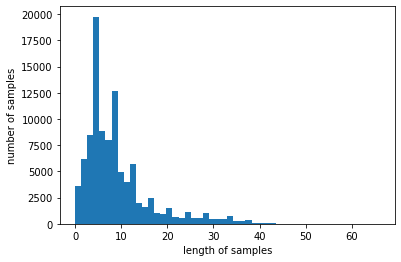

In [ ]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 97.04841207586637


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# 워드 임베딩

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=removed_stopword_corpus, size=200, window=5, min_count=4, workers=4, sg=1)

In [ ]:
model.init_sims(replace=True)

In [ ]:
model.wv.vectors.shape

(12519, 200)

In [ ]:
model.wv['사랑']

array([-3.99497785e-02,  4.25230339e-02,  1.58802420e-01,  5.59141040e-02,
        1.46539673e-01, -1.28142416e-01,  1.11599779e-03,  1.13892667e-01,
       -8.33140686e-02,  2.02570669e-02,  1.42111510e-01,  2.17871964e-02,
       -1.71691682e-02, -9.91985649e-02,  1.58706501e-01, -3.63944247e-02,
       -7.71186277e-02, -9.11954418e-03, -5.70480525e-02, -8.03217664e-02,
        2.23963466e-02, -6.92473352e-02,  9.50548127e-02, -1.37184724e-01,
        9.68629271e-02,  4.03959723e-03,  1.13377161e-01, -2.31838506e-02,
        3.61062102e-02, -1.24317454e-02,  2.39535421e-02, -1.66841261e-02,
       -4.49919626e-02,  8.57500881e-02, -5.63912950e-02,  5.82966534e-03,
       -7.62025118e-02, -4.21122313e-02, -5.99255264e-02, -4.72563133e-02,
       -1.12740733e-01,  1.56522721e-01,  1.26181692e-02, -4.25273851e-02,
        7.33837625e-03, -6.61362410e-02, -4.37059700e-02, -2.64401678e-02,
       -2.57272683e-02, -3.66869234e-02, -2.78655766e-03,  4.75488938e-02,
       -2.50170231e-02,  

In [ ]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('khaii_skipgram') #모델 저장

### 4) embedding matrix

In [ ]:
model = KeyedVectors.load_word2vec_format('khaii_skipgram', binary=False, encoding='utf-8')

In [ ]:
model.wv.doesnt_match("멜로 호러 여자 남자 키스".split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'호러'

In [ ]:
model.wv.most_similar("잼")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('꿀', 0.829940915107727),
 ('잼임', 0.7632030844688416),
 ('허니잼', 0.7507115006446838),
 ('개꿀', 0.735203742980957),
 ('개잼', 0.7342928647994995),
 ('잼이', 0.7018729448318481),
 ('졸잼', 0.6971260905265808),
 ('재밋', 0.6911516189575195),
 ('노잼', 0.689109742641449),
 ('졸', 0.6857008337974548)]

In [ ]:
embedding_matrix = np.zeros((vocab_size, 200))
print(np.shape(embedding_matrix))

(21549, 200)


In [ ]:
def get_vector(word):
  if word in model:
    return model[[word]]
  else:
    return None

In [ ]:
for word, i in t.word_index.items():
  temp = get_vector(word)
  if temp is not None:
    embedding_matrix[i] = temp

### 5) Embedding 레이어 만들어보기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

In [ ]:
num_words, emb_dim = model.wv.vectors.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
emb = Embedding(input_dim=num_words, output_dim=emb_dim, trainable=False, weights=[model.wv.vectors])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
net = Sequential()
net.add(emb)

In [ ]:
i = model.wv.index2word.index('사랑')
net.predict([i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([[[-3.99497785e-02,  4.25230339e-02,  1.58802420e-01,
          5.59141040e-02,  1.46539673e-01, -1.28142416e-01,
          1.11599779e-03,  1.13892667e-01, -8.33140686e-02,
          2.02570669e-02,  1.42111510e-01,  2.17871964e-02,
         -1.71691682e-02, -9.91985649e-02,  1.58706501e-01,
         -3.63944247e-02, -7.71186277e-02, -9.11954418e-03,
         -5.70480525e-02, -8.03217664e-02,  2.23963466e-02,
         -6.92473352e-02,  9.50548127e-02, -1.37184724e-01,
          9.68629271e-02,  4.03959723e-03,  1.13377161e-01,
         -2.31838506e-02,  3.61062102e-02, -1.24317454e-02,
          2.39535421e-02, -1.66841261e-02, -4.49919626e-02,
          8.57500881e-02, -5.63912950e-02,  5.82966534e-03,
         -7.62025118e-02, -4.21122313e-02, -5.99255264e-02,
         -4.72563133e-02, -1.12740733e-01,  1.56522721e-01,
          1.26181692e-02, -4.25273851e-02,  7.33837625e-03,
         -6.61362410e-02, -4.37059700e-02, -2.64401678e-02,
         -2.57272683e-02, -3.66869234e-0

# CNN + LSTM modeling

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D, Dense, Input, Flatten, Concatenate, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
model_cnnLSTM = Sequential()
e = Embedding(vocab_size, 200, weights =[embedding_matrix], input_length=max_len, mask_zero=True, trainable=True)
model_cnnLSTM.add(e)
model_cnnLSTM.add(Conv1D(128, 5, strides=1, padding='valid', activation='relu'))
model_cnnLSTM.add(MaxPooling1D(pool_size=4))
model_cnnLSTM.add(Dropout(0.25))
model_cnnLSTM.add(Bidirectional(LSTM(128)))
model_cnnLSTM.add(Dropout(0.25))
model_cnnLSTM.add(Dense(1, activation='sigmoid'))
model_cnnLSTM.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 200)           4309800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 26, 128)           128128    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model_cnnLSTM.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])
history = model_cnnLSTM.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=32, validation_split=0.2)

Epoch 1/30
2486/2486 [==============================] - ETA: 0s - loss: 0.5297 - acc: 0.7184
Epoch 00001: val_acc improved from -inf to 0.73934, saving model to best_model.h5
2486/2486 [==============================] - 207s 83ms/step - loss: 0.5297 - acc: 0.7184 - val_loss: 0.5021 - val_acc: 0.7393
Epoch 2/30
2486/2486 [==============================] - ETA: 0s - loss: 0.4346 - acc: 0.7841
Epoch 00002: val_acc improved from 0.73934 to 0.74422, saving model to best_model.h5
2486/2486 [==============================] - 207s 83ms/step - loss: 0.4346 - acc: 0.7841 - val_loss: 0.5040 - val_acc: 0.7442
Epoch 3/30
2486/2486 [==============================] - ETA: 0s - loss: 0.3511 - acc: 0.8272
Epoch 00003: val_acc did not improve from 0.74422
2486/2486 [==============================] - 207s 83ms/step - loss: 0.3511 - acc: 0.8272 - val_loss: 0.5604 - val_acc: 0.7404
Epoch 4/30
2486/2486 [==============================] - ETA: 0s - loss: 0.2817 - acc: 0.8590
Epoch 00004: val_acc did not impr

In [ ]:
model_cnnLSTM.save_weights("best_model.h5")

In [ ]:
model_json = model_cnnLSTM.to_json()
with open("model_cnnLSTM.json", "w") as json_file : 
    json_file.write(model_json)

In [ ]:
from keras.models import model_from_json 
json_file = open("model_cnnLSTM.json", "r") 
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.load_weights("best_model.h5")

In [ ]:
loaded_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# model evaluation
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1633/1633 [==============================] - 13s 8ms/step - loss: 0.7362 - accuracy: 0.7066

 테스트 정확도: 0.7066


모델 설명 \
CNN의 convolution layer를 적용하여 단어의 지역 특징을 추출하고, pooling layer에서 LSTM을 이용하여 공간 및 시간적 특징을 동시에 고려

다들 고생하는데 많이 도움 못준거 같아 미안한 마음..